# Practical 1
23AIML056 Kavya

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import *

## Data importing

In [2]:
df = pd.read_csv("Datasets\\Player.csv")
df.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [3]:
df.shape

(322, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  322 non-null    object 
 1   AtBat       322 non-null    int64  
 2   Hits        322 non-null    int64  
 3   HmRun       322 non-null    int64  
 4   Runs        322 non-null    int64  
 5   RBI         322 non-null    int64  
 6   Walks       322 non-null    int64  
 7   Years       322 non-null    int64  
 8   CAtBat      322 non-null    int64  
 9   CHits       322 non-null    int64  
 10  CHmRun      322 non-null    int64  
 11  CRuns       322 non-null    int64  
 12  CRBI        322 non-null    int64  
 13  CWalks      322 non-null    int64  
 14  League      322 non-null    object 
 15  Division    322 non-null    object 
 16  PutOuts     322 non-null    int64  
 17  Assists     322 non-null    int64  
 18  Errors      322 non-null    int64  
 19  Salary      263 non-null    f

## Impude null values

In [5]:
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = df.select_dtypes(include=["object"]).columns
print(f"numerical cols: {numerical_cols}")
print(f"categorical cols: {categorical_cols}")

numerical cols: Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors', 'Salary'],
      dtype='object')
categorical cols: Index(['Unnamed: 0', 'League', 'Division', 'NewLeague'], dtype='object')


In [6]:
for col in numerical_cols:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  322 non-null    object 
 1   AtBat       322 non-null    int64  
 2   Hits        322 non-null    int64  
 3   HmRun       322 non-null    int64  
 4   Runs        322 non-null    int64  
 5   RBI         322 non-null    int64  
 6   Walks       322 non-null    int64  
 7   Years       322 non-null    int64  
 8   CAtBat      322 non-null    int64  
 9   CHits       322 non-null    int64  
 10  CHmRun      322 non-null    int64  
 11  CRuns       322 non-null    int64  
 12  CRBI        322 non-null    int64  
 13  CWalks      322 non-null    int64  
 14  League      322 non-null    object 
 15  Division    322 non-null    object 
 16  PutOuts     322 non-null    int64  
 17  Assists     322 non-null    int64  
 18  Errors      322 non-null    int64  
 19  Salary      322 non-null    f

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2564\1922983251.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_2564\1922983251.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [7]:
df.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,425.0,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


## Statistics of our data

In [8]:
df.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,515.600953
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,409.817459
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,226.250000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,700.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


## Encode categorical values

In [9]:
le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

df.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,11,293,66,1,30,29,14,1,293,66,...,30,29,14,0,0,446,33,20,425.0,0
1,1,315,81,7,24,38,39,14,3449,835,...,321,414,375,1,1,632,43,10,475.0,1
2,6,479,130,18,66,72,76,3,1624,457,...,224,266,263,0,1,880,82,14,480.0,0
3,7,496,141,20,65,78,37,11,5628,1575,...,828,838,354,1,0,200,11,3,500.0,1
4,9,321,87,10,39,42,30,2,396,101,...,48,46,33,1,0,805,40,4,91.5,1


## Checking and handling for outliers

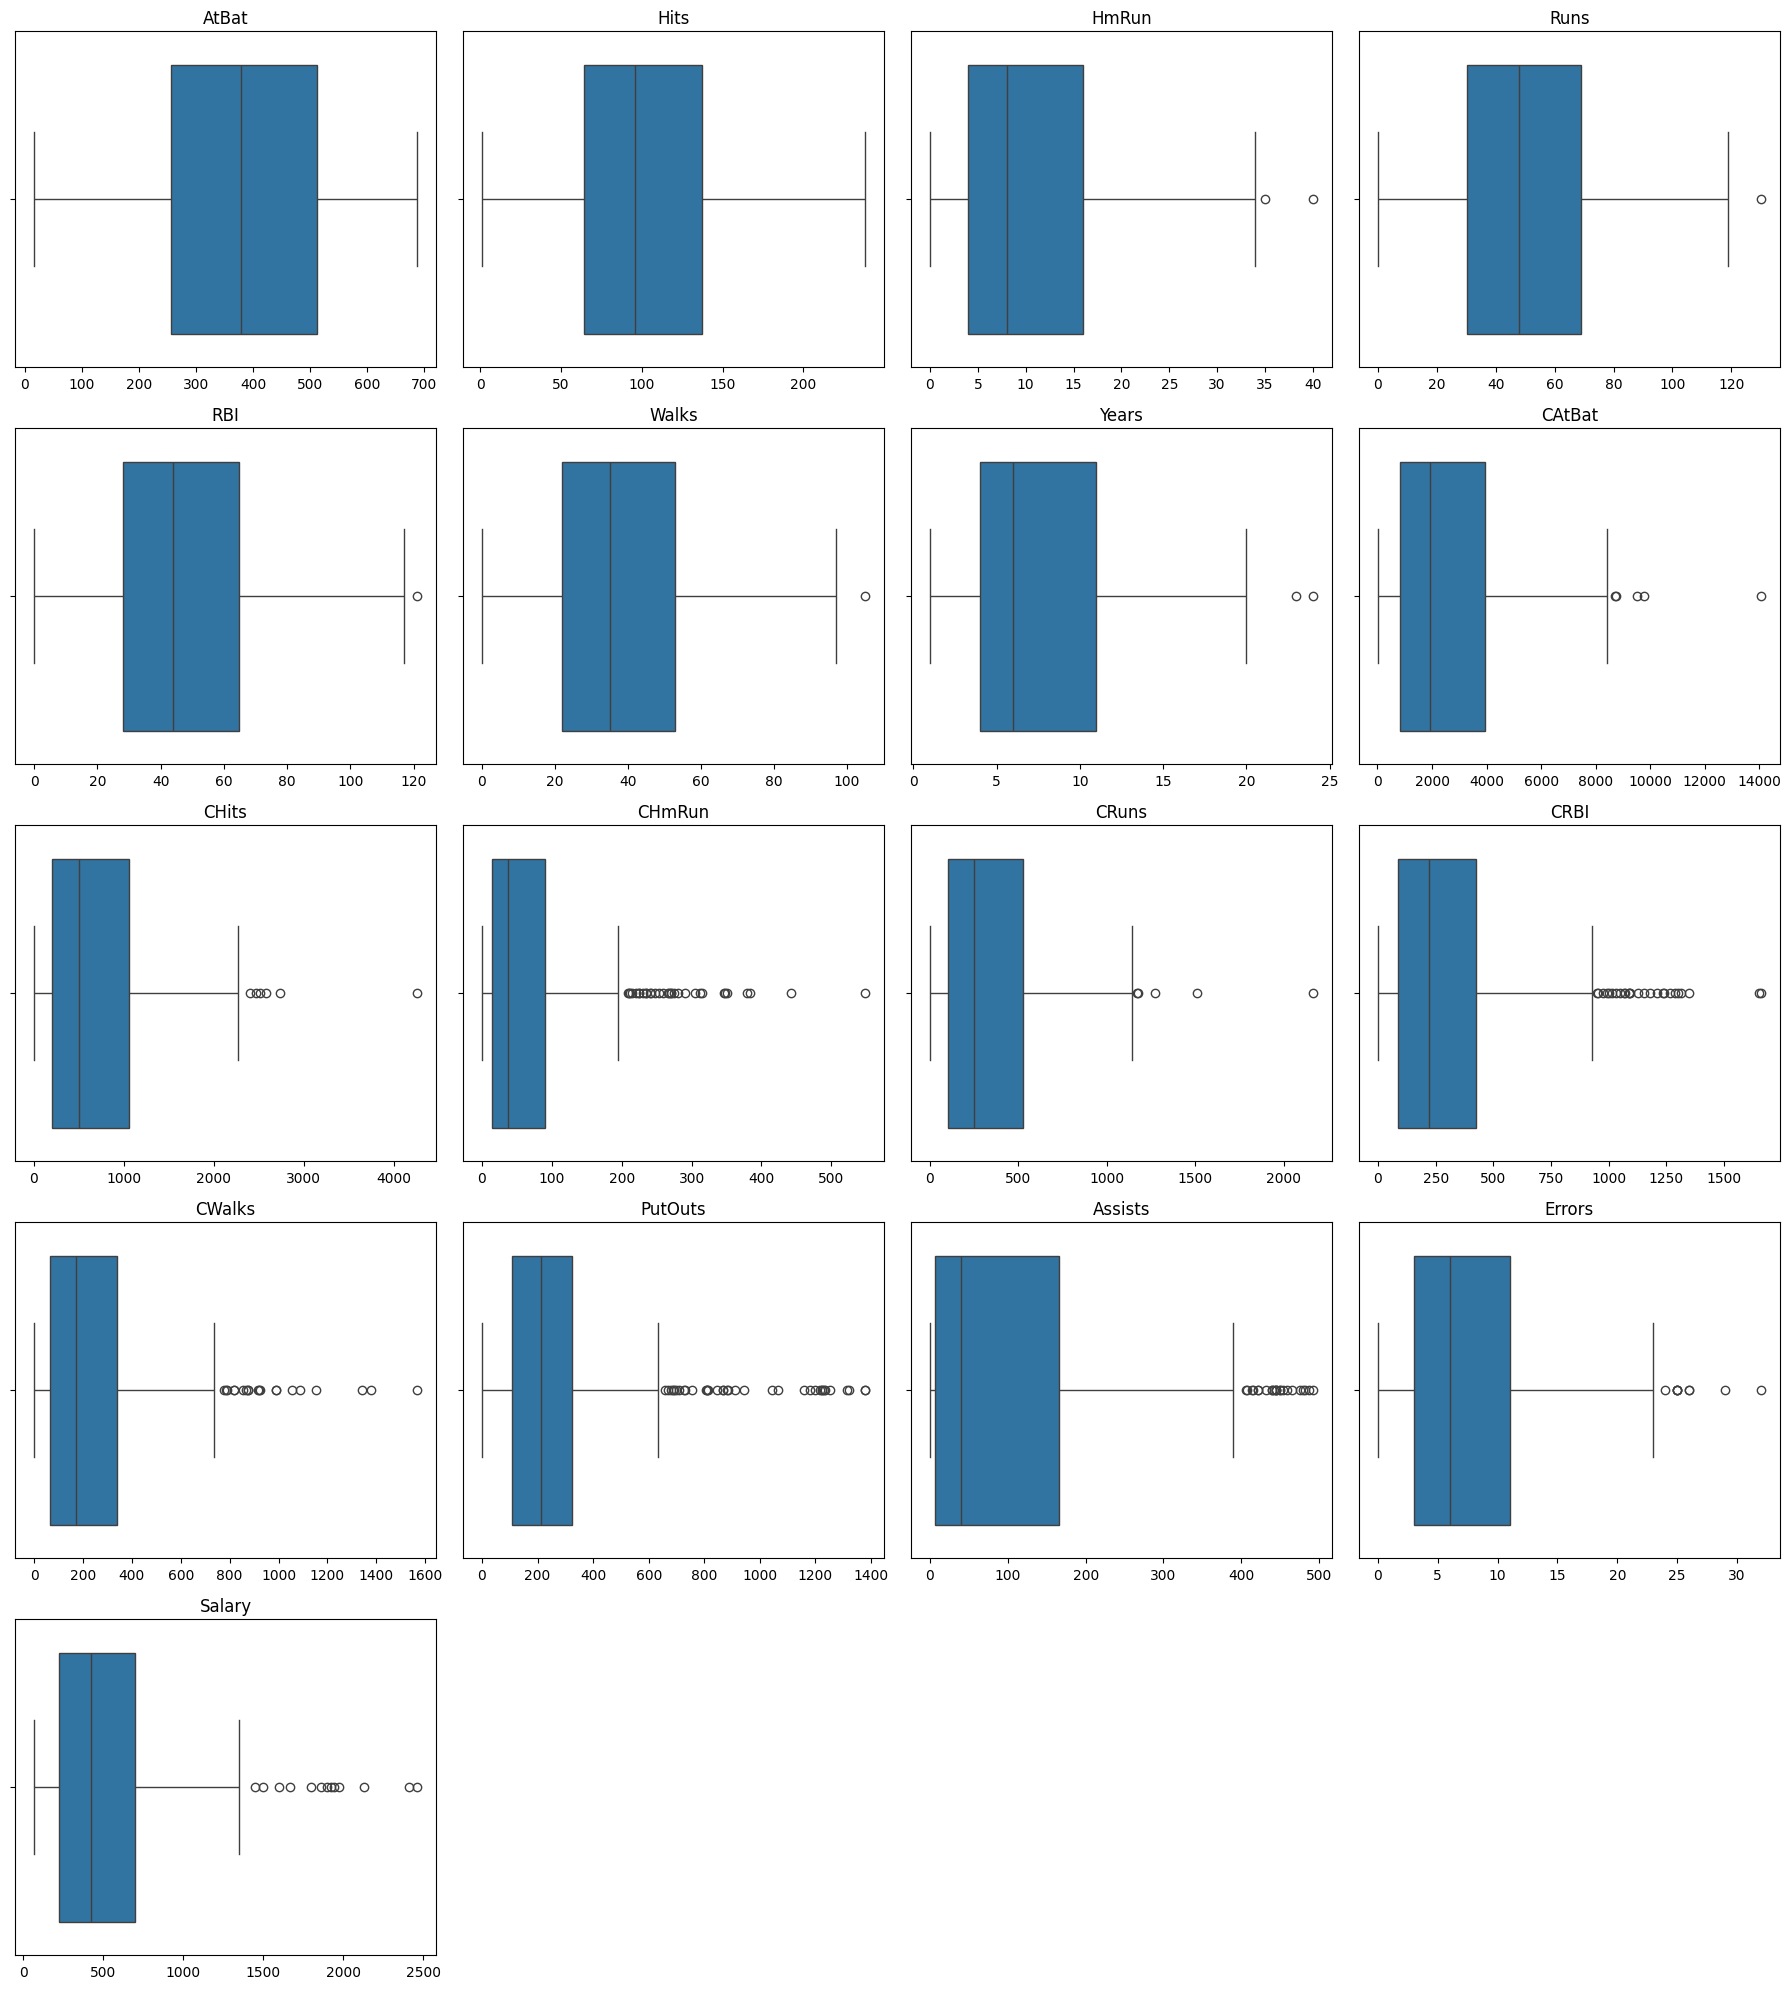

In [10]:
num_features = len(numerical_cols)
cols = 4
rows = math.ceil(num_features / cols)

plt.figure(figsize=(18, 4 * rows))

for idx, col in enumerate(numerical_cols, 1):
    plt.subplot(rows, cols, idx)
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.xlabel("")

for idx in range(num_features + 1, rows * cols + 1):
    plt.subplot(rows, cols, idx)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [11]:
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], lower_bound, upper_bound)

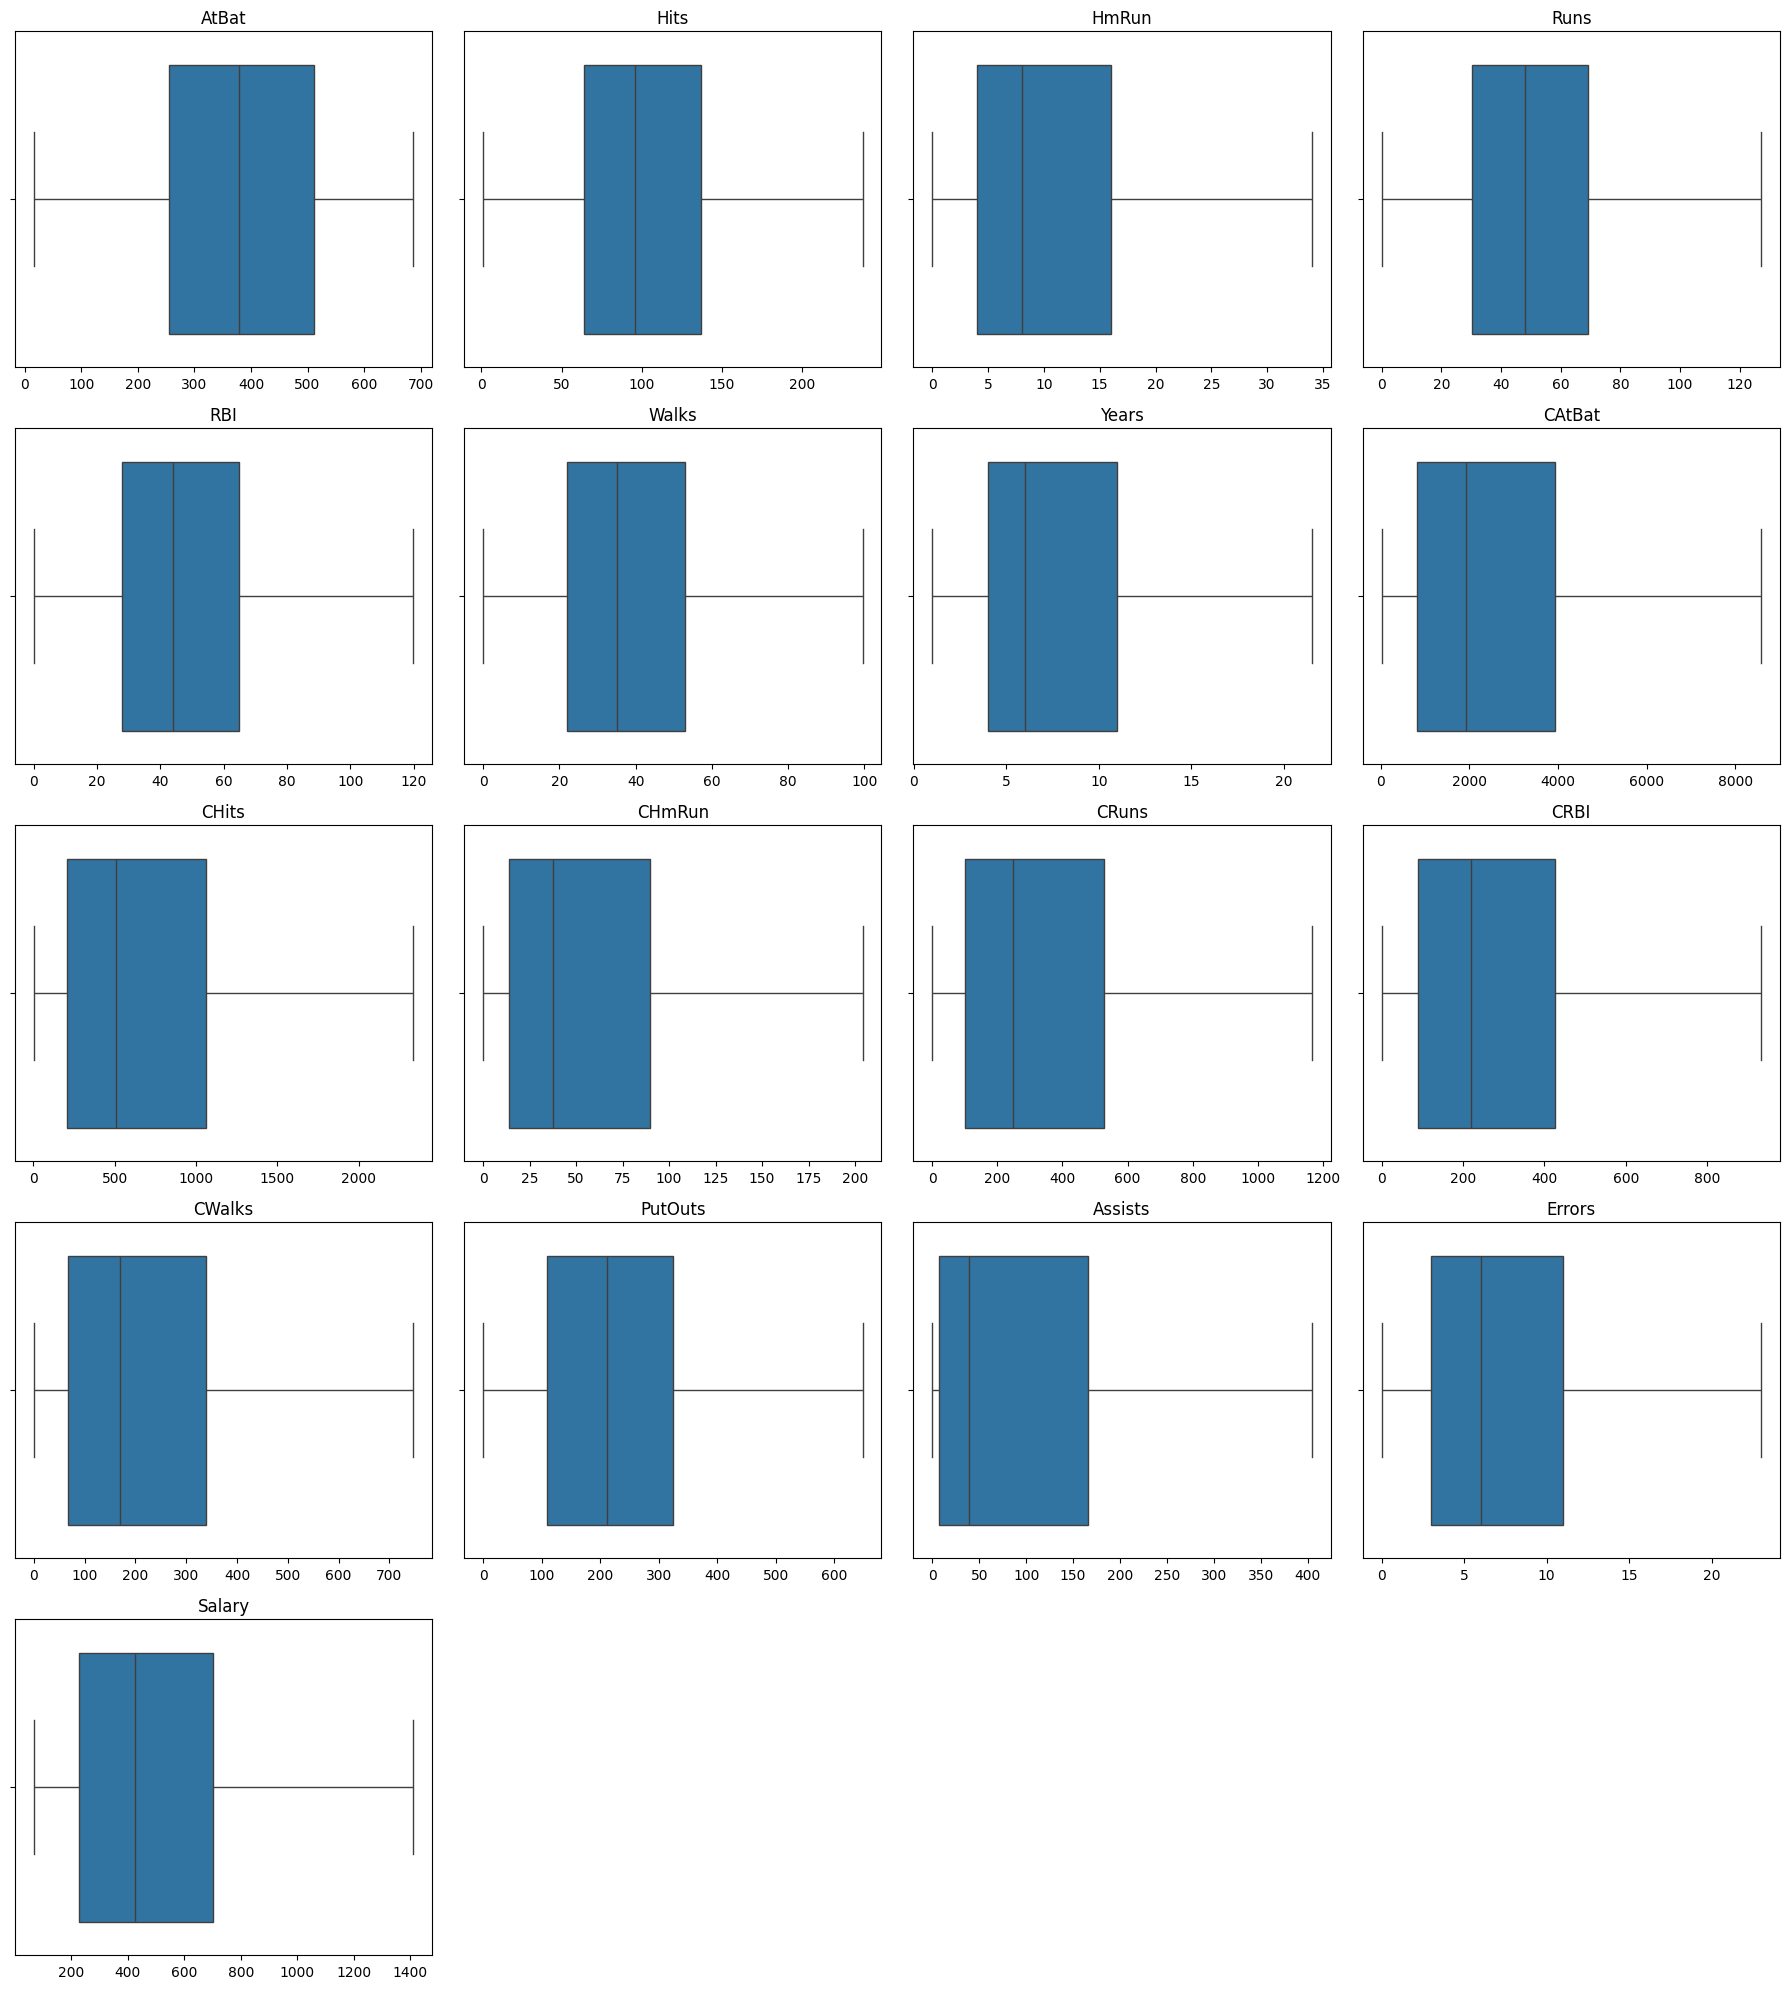

In [12]:
num_features = len(numerical_cols)
cols = 4
rows = math.ceil(num_features / cols)

plt.figure(figsize=(18, 4 * rows))

for idx, col in enumerate(numerical_cols, 1):
    plt.subplot(rows, cols, idx)
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.xlabel("")

for idx in range(num_features + 1, rows * cols + 1):
    plt.subplot(rows, cols, idx)
    plt.axis('off')

plt.tight_layout()
plt.show()

## Splitting the data

In [13]:
X = df.drop(columns="Salary", axis = 1)
y = df["Salary"]

In [14]:
alphas = 10**np.linspace(10,-2,100)*0.00001
ridge = Ridge()
coeffs = []
sc = StandardScaler()

In [15]:
for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(sc.fit_transform(X), y)
    coeffs.append(ridge.coef_)
np.shape(coeffs)

(100, 20)

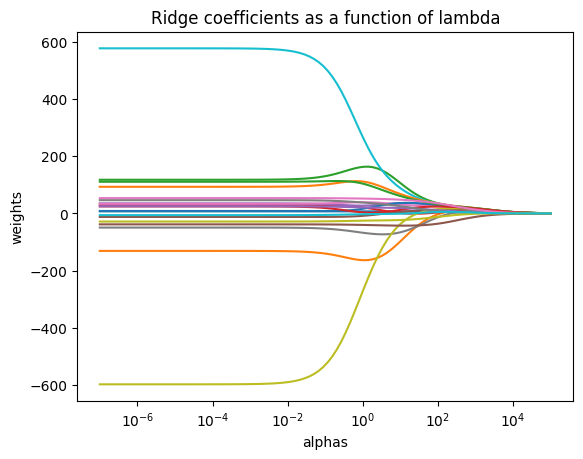

In [16]:
ax = plt.gca()
ax.plot(alphas,coeffs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alphas')
plt.ylabel('weights')
plt.title("Ridge coefficients as a function of lambda")
plt.show()

#### Conclusion

Our optimal range for alpha from this plot is 1 to 100.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Ridge

In [18]:
rmse_list = []
r2_list = []

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for a in range(1,101):
    ridge = Ridge(alpha=a)
    ridge.fit(X_train_scaled, y_train)
    
    y_pred = ridge.predict(X_test_scaled)
    
    rmse_list.append(mean_squared_error(y_test, y_pred))
    r2_list.append(r2_score(y_test, y_pred))

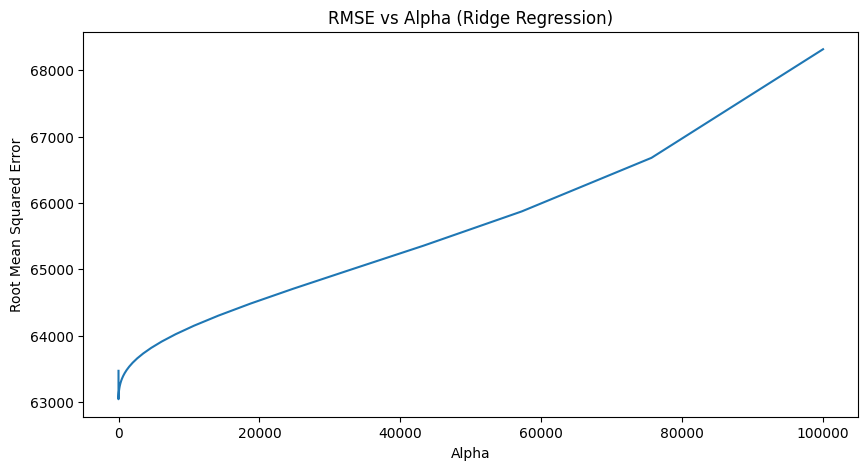

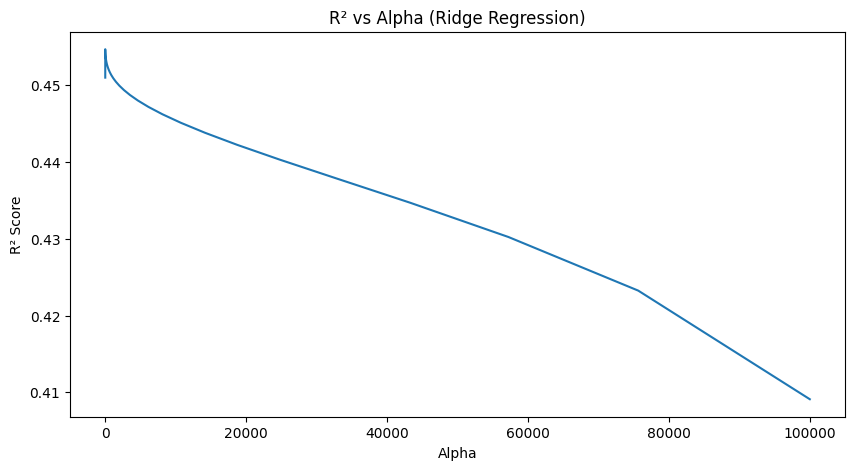

In [19]:
plt.figure(figsize=(10,5))
plt.plot(alphas, rmse_list)
plt.xlabel("Alpha")
plt.ylabel("Root Mean Squared Error")
plt.title("RMSE vs Alpha (Ridge Regression)")
plt.show()


plt.figure(figsize=(10,5))
plt.plot(alphas, r2_list)
plt.xlabel("Alpha")
plt.ylabel("R² Score")
plt.title("R² vs Alpha (Ridge Regression)")
plt.show()

In [20]:
s = StandardScaler()
ridgecv = RidgeCV(alphas=alphas,cv=20)
ridgecv.fit(s.fit_transform(X_train), y_train)
print(f"Best ridge alpha value is {ridgecv.alpha_}")

Best ridge alpha value is 93.26033468832199


In [21]:
s = StandardScaler()
opt_ridge = Ridge(alpha=ridgecv.alpha_)
opt_ridge.fit(s.fit_transform(X_train), y_train)
pred = opt_ridge.predict(s.transform(X_test))
print(f"{np.sqrt(mean_squared_error(y_test, pred))}")

251.78450820066078


## Lasso

In [22]:
lasso = Lasso(max_iter=100000)
sc = StandardScaler()
coeffs=[]

In [23]:
for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(sc.fit_transform(X), y)
    coeffs.append(lasso.coef_)
np.shape(coeffs)

(100, 20)

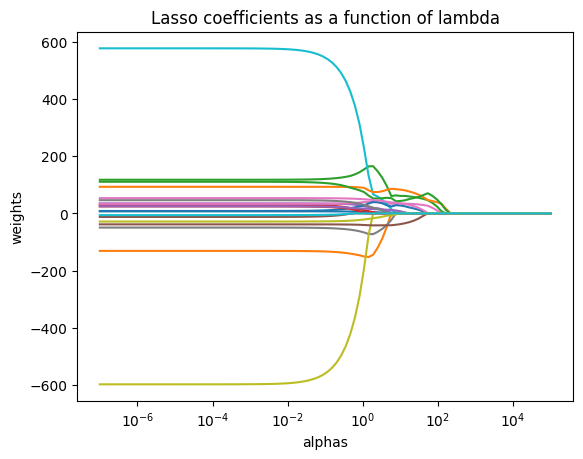

In [24]:
ax = plt.gca()
ax.plot(alphas,coeffs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alphas')
plt.ylabel('weights')
plt.title("Lasso coefficients as a function of lambda")
plt.show()

In [25]:
s = StandardScaler()
lassocv = LassoCV(alphas=None,cv=10,max_iter=100000)
lassocv.fit(s.fit_transform(X_train), y_train)
print(f"Best ridge alpha value is {lassocv.alpha_}")

Best ridge alpha value is 0.8006037208766342


c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1682: FutureWarning: 'alphas=None' is deprecated and will be removed in 1.9, at which point the default value will be set to 100. Set 'alphas=100' to silence this warning.
  warnings.warn(


In [26]:
s = StandardScaler()
opt_lasso = Lasso(alpha=ridgecv.alpha_)
opt_lasso.fit(s.fit_transform(X_train), y_train)
pred = opt_lasso.predict(s.transform(X_test))
print(f"{np.sqrt(mean_squared_error(y_test, pred))}")

297.3096003178441


## Random Forest

In [27]:
from sklearn.ensemble import RandomForestRegressor

In [28]:
rf = RandomForestRegressor()
s = StandardScaler()
rf.fit(s.fit_transform(X_train), y_train)
pred = rf.predict(s.transform(X_test))
rmse = np.sqrt(mean_absolute_error(y_test, pred))
r2 = r2_score(y_test, pred)
print(f"RMSE: {rmse}\nR2: {r2}")

RMSE: 12.558763229162091
R2: 0.5999677377224975
